In [1]:
from pathlib import Path
import os
import shutil
import glob
import cv2
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/workspace/dataset/aff-wild_csv/train.csv')

In [3]:
train['image_path'][0]

'/workspace/dataset/aff-wild/110-30-270x480/00001.jpg'

In [4]:
train['name'] = train['image_path'].map(lambda x : x.split('/')[-2])

In [5]:
train['label'] = train['label'].astype(str)

In [6]:
train['du'] = train['name'] + "_" + train['label']

In [7]:
len(train['name'].unique())

248

In [8]:
len(train)

1089929

In [9]:
train[train['name'] == '5-60-1920x1080-2'].label.unique()

array(['0', '-1', '4', '5'], dtype=object)

In [10]:
train_du = train.drop_duplicates('du')

In [11]:
train_du[train_du['name'] == '5-60-1920x1080-2'].label

436807     0
436847    -1
438590     4
441232     5
Name: label, dtype: object

In [12]:
num_train = train_du.groupby('name').count().label.reset_index()

In [13]:
import matplotlib.pyplot as plt

In [14]:
num_train

,name,label
0,1-30-1280x720,3
1,10-60-1280x720,4
2,10-60-1280x720_right,3
3,100-29-1080x1920,3
4,101-30-1080x1920,3
...,...,...
243,video72,3
244,video79,4
245,video8,3
246,video93,3


In [15]:
x_index = num_train.label.unique()

In [16]:
num_train['label'].value_counts()

3    81
4    61
2    46
5    38
6    11
1     6
7     3
8     2
Name: label, dtype: int64

In [17]:
bar_train = num_train.label.value_counts().reset_index()

In [18]:
bar_train

,index,label
0,3,81
1,4,61
2,2,46
3,5,38
4,6,11
5,1,6
6,7,3
7,8,2


In [19]:
x_index

array([3, 4, 2, 5, 1, 6, 7, 8])

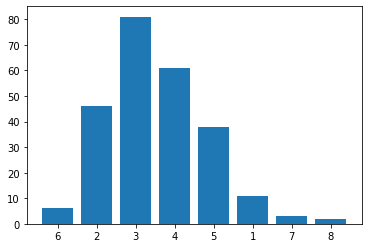

In [20]:
plt.bar(bar_train['index'],bar_train['label'])
plt.xticks(bar_train['index'], x_index)
plt.show()

In [23]:
train

,image_path,purpose,label,name,du
0,/workspace/dataset/aff-wild/110-30-270x480/000...,Train,0,110-30-270x480,110-30-270x480_0
1,/workspace/dataset/aff-wild/110-30-270x480/000...,Train,0,110-30-270x480,110-30-270x480_0
2,/workspace/dataset/aff-wild/110-30-270x480/000...,Train,0,110-30-270x480,110-30-270x480_0
3,/workspace/dataset/aff-wild/110-30-270x480/000...,Train,0,110-30-270x480,110-30-270x480_0
4,/workspace/dataset/aff-wild/110-30-270x480/000...,Train,0,110-30-270x480,110-30-270x480_0
...,...,...,...,...,...
1089924,/workspace/dataset/aff-wild/112-30-640x360/059...,Train,0,112-30-640x360,112-30-640x360_0
1089925,/workspace/dataset/aff-wild/112-30-640x360/059...,Train,0,112-30-640x360,112-30-640x360_0
1089926,/workspace/dataset/aff-wild/112-30-640x360/060...,Train,0,112-30-640x360,112-30-640x360_0
1089927,/workspace/dataset/aff-wild/112-30-640x360/060...,Train,0,112-30-640x360,112-30-640x360_0


In [58]:
label_counts = []
for data in train.iterrows():
    name = data[1]['name']
    ct_label = num_train[num_train['name'] == name].label.values[0]
    label_counts.append(ct_label)